In [1]:
import pandas as pd 
import numpy as np
import folium
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from IPython.display import display

## Ingest Data
- preprocessed_eviction_data.csv is generated from ingest_data.py

In [2]:
df = pd.read_csv('preprocessed_eviction_data.csv')

## Exploratory Data Analysis

In [3]:
from eda import EvictionVisualizer 
viz = EvictionVisualizer(df)
counts = viz.get_eviction_counts()
counts

Executed Date,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-17,...,2025-04-21,2025-04-22,2025-04-23,2025-04-24,2025-04-25,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02
BOROUGH,,,,,,,,,,,,,,,,,,,,,
BRONX,38,44,47,48,22,35,34,38,30,29,...,32,6,42,36,32,12,0,45,18,2
BROOKLYN,13,51,17,55,40,14,42,22,24,15,...,16,32,18,4,11,34,32,1,9,21
MANHATTAN,27,10,21,12,18,30,9,17,13,25,...,12,21,0,12,11,11,13,6,6,0
QUEENS,17,18,23,22,12,15,20,17,24,24,...,9,10,16,40,10,15,16,7,7,23
STATEN ISLAND,4,5,3,1,1,3,3,2,0,1,...,4,4,1,4,2,1,2,2,4,0


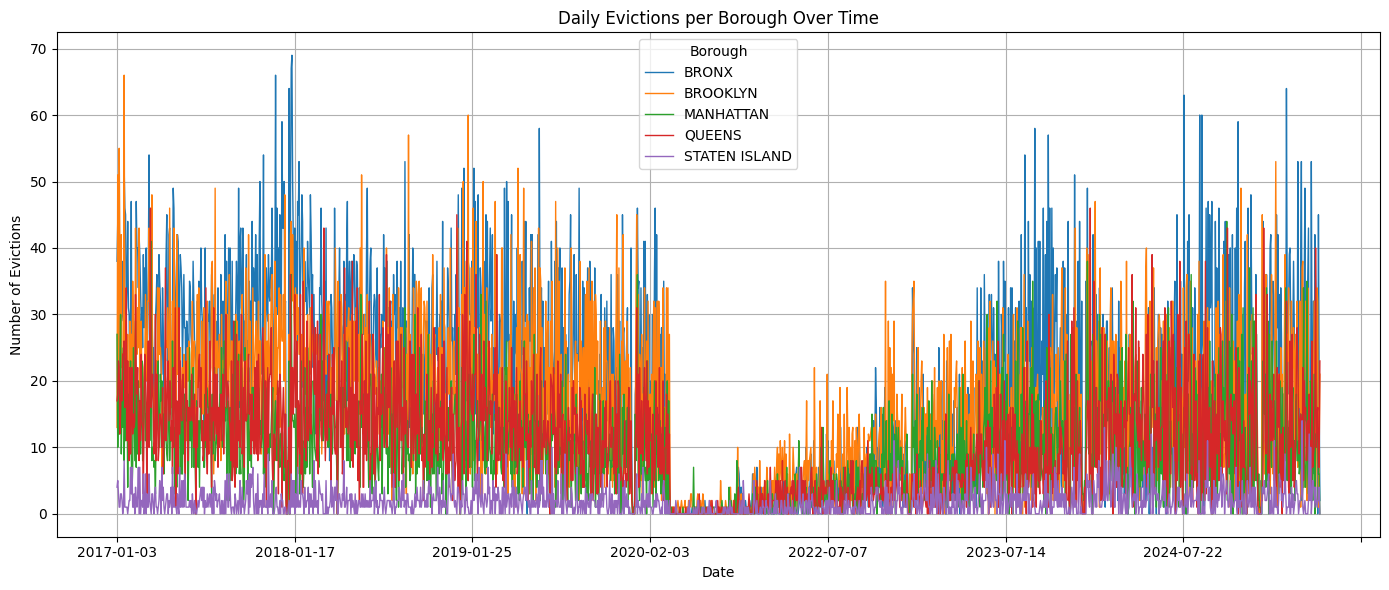

In [4]:
viz.plot_evictions_over_time()

There is a peak for evictions mainly in the Bronx and Brooklyn on January 17th, 2018. Interestingly, this is the same day that the Right to Counsel in Housing Court was implemented by New York City. This law provides tenants facing eviction in housing court or NYCHA administrative proceedings to free legal representation. 

In [5]:
viz.plot_time_series_heatmap()

In [6]:
viz.plot_static_heatmap()

Plotting the changes in eviction counts over time from 2017 to 2025 (ranges from January 3rd, 2017 to May 2nd, 2025) shows that the West Bronx and East Flatbush areas experience a high number of evictions every single day while other areas in other boroughs are relatively stable, experiencing very few evictions if at all.

In [7]:
bronx_df = df[df['BOROUGH'] == 'BRONX']
viz_bronx = EvictionVisualizer(bronx_df)
geo_bronx = viz_bronx.get_geo_df()
geo_bronx = geo_bronx.drop(['Executed Date'], axis=1)
geo_bronx.head()

,Latitude,Longitude,Year,lat_bin,lon_bin
91,40.822122,-73.914211,2017,40.822,-73.914
94,40.822893,-73.924652,2017,40.823,-73.925
112,40.830189,-73.918555,2017,40.830,-73.919
114,40.851422,-73.907172,2017,40.851,-73.907
115,40.865154,-73.895088,2017,40.865,-73.895


In [8]:
mean_lat_lon = geo_bronx.groupby('Year')[['lat_bin', 'lon_bin']].mean()
mean_lat_lon = mean_lat_lon.round(3)
mean_lat_lon

,lat_bin,lon_bin
Year,,
2017,40.850,-73.889
2018,40.849,-73.889
2019,40.848,-73.888
2020,40.849,-73.889
2021,40.850,-73.891
2022,40.851,-73.886
2023,40.849,-73.889
2024,40.848,-73.889
2025,40.848,-73.889


In [9]:
geo_bronx = geo_bronx.drop(['Year'], axis=1)
geo_bronx.mean()

Latitude     40.849014
Longitude   -73.888657
lat_bin      40.849007
lon_bin     -73.888653
dtype: float64

Taking the mean latitude and longitude for each year (based on bins, and rounding to place mean in bins), it is shown that the centroid of eviction points is in 40.850, -73.889, with slight changes each year. which is roughly in the West Bronx. This corresponds to assembly district 86, which had the 2nd highest eviction filing rate (alongside assembly district 78 which ranked 1st, just north of West Bronx). 

[Bronx sees second highest eviction filing rate in the state, with data revealing hot spots in the borough](https://www.bxtimes.com/bronx-eviction-filing-rate-state-data/)